# CHAT-GPT SENTIMENT ANALYSIS - ML

## Objective
- Sentiment analysis, also known as opinion mining, is a powerful natural language processing (NLP) technique that aims to identify and extract subjective information from textual data. The primary goal of sentiment analysis is to determine the sentiment or emotional tone expressed in the text, which can be positive, negative, neutral, or even a mixture of these sentiments.
- In this project we are using data that are collected in twitter on tweets about Chat-GPT.

## Dataset Description
The dataset used for this project consists of the following :
- **Tweets** : The tweets about Chat- GPT
- **Labels** : The coresponding sentimetal labels(ie,good,bad,neutral)

##  Steps
- Import Libraries
- Read Data
- Data Preprocessing
- Feature Engineering
- Model Training

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Read the train data

- Reading the data into the pandas dataframe is the first step in machine learning. To read data from a file into a pandas DataFrame, we can use the 'pd.read_csv()' function if your data is in CSV format. If our data is in a different format, then there are corresponding functions available in pandas.

In [2]:
data=pd.read_csv('files/train/raw/train.csv')

In [3]:
data

,tweets,labels
0,Vaiot: Looks like the current pattern we are i...,neutral
1,The Cloud Native Security Manifesto!\n#OpenAI ...,neutral
2,Do you feel #chatGPT is gonna take most of pro...,bad
3,Exciting demonstration of ChatGPT. It is good ...,good
4,Stack Overflow questions are being flooded wit...,bad
...,...,...
153500,.@ChatGPT_ERC_Bot pleasee explain quantum comp...,neutral
153501,I'm thinking ChatGPT could give the tour https...,bad
153502,Asking #ChatGPT: Please cite a few things whic...,bad
153503,I asked ChatGPT to write about itself in my st...,bad


## Data Preprocessing

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model.

In [4]:
#To see the information of the datast
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153505 entries, 0 to 153504
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   tweets  153505 non-null  object
 1   labels  153505 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [5]:
#To check if there is any null value
data.isnull().sum()

tweets    0
labels    0
dtype: int64

In [6]:
#To check if there is any nan value
data.isna().sum()

tweets    0
labels    0
dtype: int64

In [7]:
#To check if there is any duplicate values
data.duplicated().sum()

997

In [8]:
#Dropping the duplicated values
data.drop_duplicates()

,tweets,labels
0,Vaiot: Looks like the current pattern we are i...,neutral
1,The Cloud Native Security Manifesto!\n#OpenAI ...,neutral
2,Do you feel #chatGPT is gonna take most of pro...,bad
3,Exciting demonstration of ChatGPT. It is good ...,good
4,Stack Overflow questions are being flooded wit...,bad
...,...,...
153500,.@ChatGPT_ERC_Bot pleasee explain quantum comp...,neutral
153501,I'm thinking ChatGPT could give the tour https...,bad
153502,Asking #ChatGPT: Please cite a few things whic...,bad
153503,I asked ChatGPT to write about itself in my st...,bad


In [9]:
#Describing the data
data.describe()

,tweets,labels
count,153505,153505
unique,152507,3
top,ChatGPT,bad
freq,84,75500


## Data Cleaning

In [10]:
import re
def cleantweet (text):
    text=re.sub('@(A-Za-z0-9)+',' ', text)   #subract @, A-Z, a-z, 0-9
    text=re.sub('#',' ', text)               #subtract #         
    text=re.sub('RT(\s)+',' ', text)         #subtract Retweets
    text=re.sub('https?:\/\/\S+',' ',text)        #subtract urls
    return text

In [11]:
data['tweets']=data['tweets'].apply(cleantweet)
data

,tweets,labels
0,Vaiot: Looks like the current pattern we are i...,neutral
1,The Cloud Native Security Manifesto!\n OpenAI ...,neutral
2,Do you feel chatGPT is gonna take most of pro...,bad
3,Exciting demonstration of ChatGPT. It is good ...,good
4,Stack Overflow questions are being flooded wit...,bad
...,...,...
153500,.@ChatGPT_ERC_Bot pleasee explain quantum comp...,neutral
153501,I'm thinking ChatGPT could give the tour,bad
153502,Asking ChatGPT: Please cite a few things whic...,bad
153503,I asked ChatGPT to write about itself in my st...,bad


## Word cloud for each label

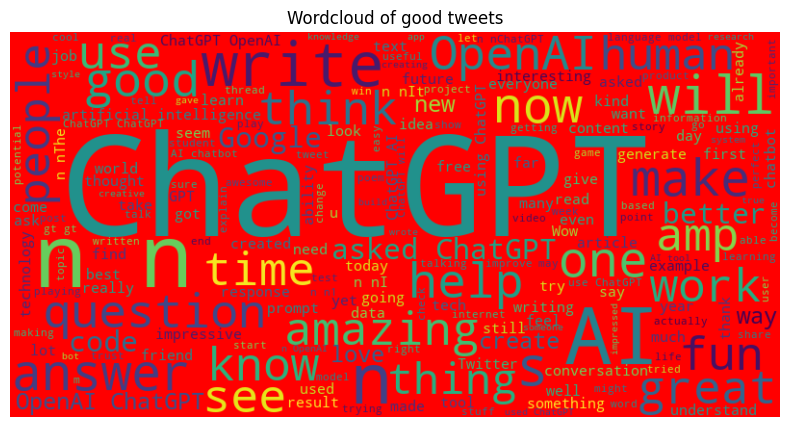

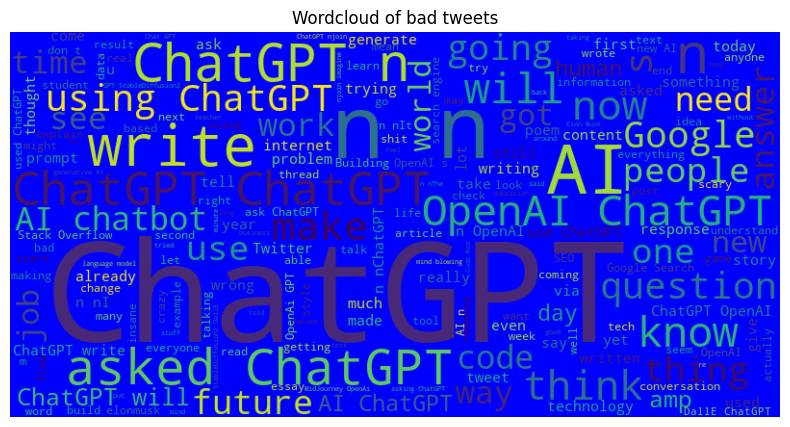

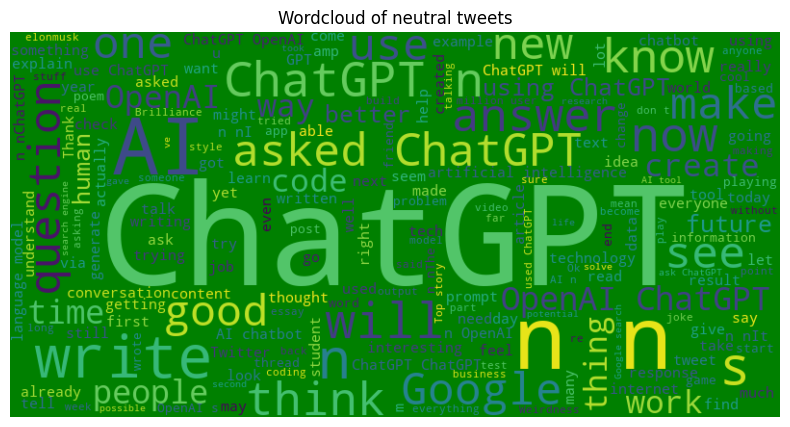

In [12]:
from wordcloud import WordCloud
good_tweets=''.join(data[data['labels']=='good']['tweets'])
bad_tweets=''.join(data[data['labels']=='bad']['tweets'])
neutral_tweets=''.join(data[data['labels']=='neutral']['tweets'])

wordcloud_good=WordCloud(width=800,height=400,background_color='red').generate(good_tweets)
wordcloud_bad=WordCloud(width=800,height=400,background_color='blue').generate(bad_tweets)
wordcloud_neutral=WordCloud(width=800,height=400,background_color='green').generate(neutral_tweets)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_good,interpolation='bilinear')
plt.title('Wordcloud of good tweets')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_bad,interpolation='bilinear')
plt.title('Wordcloud of bad tweets')
plt.axis('off')
plt.show()

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neutral,interpolation='bilinear')
plt.title('Wordcloud of neutral tweets')
plt.axis('off')
plt.show()

## Feature Engineering

- Feature Engineering is the process of extracting and organizing the important features from raw data in such a way that it fits the purpose of the machine learning model.

In [13]:
#features and labels
df=data.copy()
y=df['labels'].copy()
x=df.drop('labels',axis=1).copy()

## Splitting train and test datas

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,shuffle=True,random_state=123)

In [15]:
x_train.to_csv('files/train/raw/x_train.csv',index=False)
y_train.to_csv('files/train/raw/y_train.csv',index=False)

x_test.to_csv('files/evaluate/raw/x_test.csv',index=False)
y_test.to_csv('files/evaluate/raw/y_test.csv',index=False)

## Feature Encoding

- Feature encoding is the process of transforming the categorical datas into numerical data. By transforming the data our machine learning model can understand the data.

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [17]:
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_encode=encoder.fit(x_train)
#Saving the file as pkl
import joblib as jb
jb.dump(x_encode,'files/train/model/train_encode_model.pkl')
x_encode=encoder.transform(x_train)
x_train_encode=pd.DataFrame(x_encode,columns=x_train.columns)

In [18]:
x_train_encode

,tweets
0,64851.0
1,54676.0
2,49140.0
3,36302.0
4,81087.0
...,...
107448,77146.0
107449,60714.0
107450,225.0
107451,66227.0


In [19]:
x_train_encode.to_csv('files/train/processed/x_train_encode.csv',index=False)

In [20]:
y_train_encode=y_train.replace({'good':0,'bad':1,'neutral':2})
y_train_encode

20965     1
123429    2
37603     0
61697     0
61876     0
         ..
146449    2
119906    2
17730     1
28030     2
15725     1
Name: labels, Length: 107453, dtype: int64

In [21]:
y_train_encode.to_csv('files/train/processed/y_train_encode.csv',index=False)

In [22]:
#Test data encoding
encoder=OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1)
x_encode=encoder.fit(x_test)
#Saving the file as pkl
import joblib as jb
jb.dump(x_encode,'files/train/model/test_encode_model.pkl')
x_encode=encoder.transform(x_test)
x_test_encode=pd.DataFrame(x_encode,columns=x_test.columns)

In [23]:
x_test_encode

,tweets
0,14894.0
1,3022.0
2,16359.0
3,18678.0
4,36195.0
...,...
46047,25956.0
46048,7494.0
46049,11757.0
46050,34904.0


In [24]:
x_test_encode.to_csv('files/train/processed/x_test_processed.csv',index=False)

In [25]:
y_test_encode=y_test.replace({'good':0,'bad':1,'neutral':2})
y_test_encode

49972     1
66153     2
15202     1
103355    1
47330     1
         ..
131165    0
98078     1
90749     1
37722     0
108291    0
Name: labels, Length: 46052, dtype: int64

In [26]:
y_test_encode.to_csv('files/train/processed/y_test_processed.csv',index=False)

## Model Training

-  Model training is a process in which a machine learning algorithm is fed with training data from which it can learn.

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rf=RandomForestClassifier()
rf.fit(x_train_encode,y_train_encode)
print('Test score : ',rf.score(x_train_encode,y_train_encode)*100)

Test score :  99.97580337449861


In [30]:
jb.dump(rf,'files/train/model/rf.pkl')

['files/train/model/rf.pkl']

## Prediction

## Load x test and y test

In [31]:
model=jb.load('files/train/model/rf.pkl')

In [32]:
model

RandomForestClassifier()

In [33]:
y_pred=pd.DataFrame(model.predict(x_test_encode))

In [34]:
y_pred

,0
0,2
1,0
2,0
3,0
4,0
...,...
46047,2
46048,2
46049,1
46050,0


## Evaluation of metrics

In [35]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [36]:
print(classification_report(y_pred,y_test_encode))
cm=confusion_matrix(y_pred,y_test_encode)

              precision    recall  f1-score   support

           0       0.26      0.25      0.25     11881
           1       0.50      0.49      0.50     23102
           2       0.24      0.26      0.25     11069

    accuracy                           0.37     46052
   macro avg       0.33      0.33      0.33     46052
weighted avg       0.38      0.37      0.37     46052



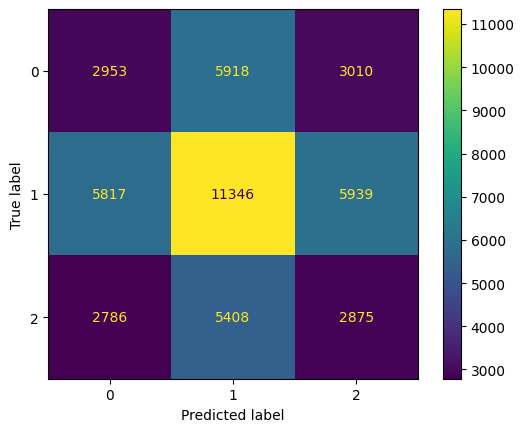

In [37]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [38]:
y_pred=y_pred.replace({0:'good',1:'bad',2:'neutral'})
y_pred

,0
0,neutral
1,good
2,good
3,good
4,good
...,...
46047,neutral
46048,neutral
46049,bad
46050,good


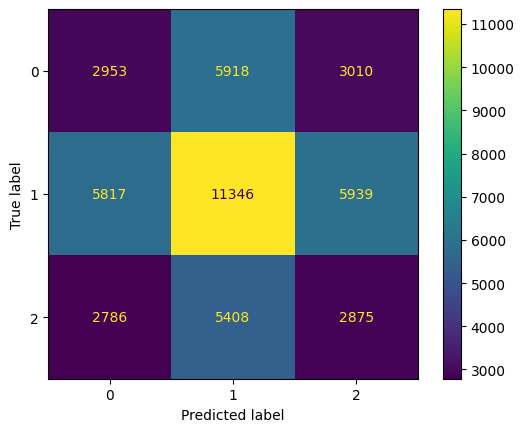

In [39]:
disp.plot()